In [53]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import warnings
warnings.filterwarnings('ignore')

In [55]:
data=pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\HRUTUJA\Imarticus\Statistics\candy_production TS.csv")
data.head()

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


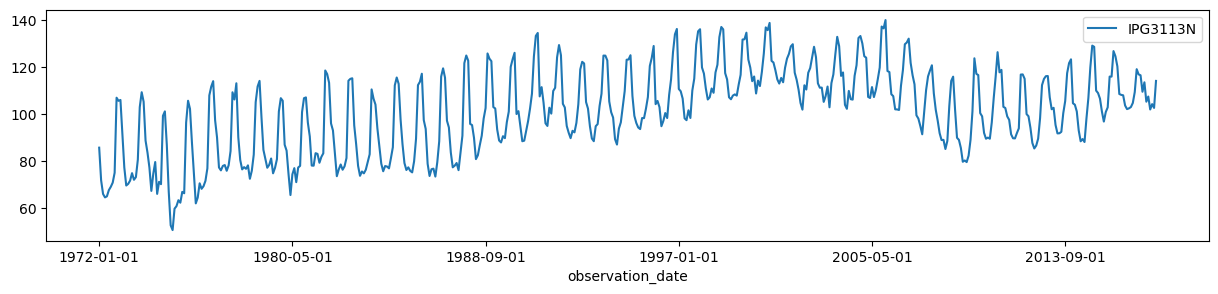

In [57]:
data.plot.line(x = 'observation_date',y = 'IPG3113N',figsize=(15,3))
plt.show()  

In [59]:
# Convert the 'observation_date' column to datetime
data['observation_date'] = pd.to_datetime(data['observation_date'])

# Convert the 'observation_date' column to PeriodIndex with monthly frequency
data['observation_date'] = data['observation_date'].dt.to_period('M')

In [61]:
data2 = data.set_index("observation_date")
data2.head()

,IPG3113N
observation_date,
1972-01,85.6945
1972-02,71.8200
1972-03,66.0229
1972-04,64.5645
1972-05,65.0100


In [63]:
model = SimpleExpSmoothing(data2,initialization_method='known',initial_level=240).fit(smoothing_level=0.7, optimized=False)
model.params

{'smoothing_level': 0.7,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 240.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [75]:
data2["Forecast"] = np.round(model.fittedvalues,2)
data2

,IPG3113N,Forecast
observation_date,,
1972-01,85.6945,240.00
1972-02,71.8200,131.99
1972-03,66.0229,89.87
1972-04,64.5645,73.18
1972-05,65.0100,67.15
...,...,...
2017-04,107.4288,107.53
2017-05,101.9209,107.46
2017-06,104.2022,103.58


In [77]:
fcast1 = np.round(model.forecast(1),2)
fcast1

2017-09    110.75
Freq: M, dtype: float64

<Axes: xlabel='observation_date'>

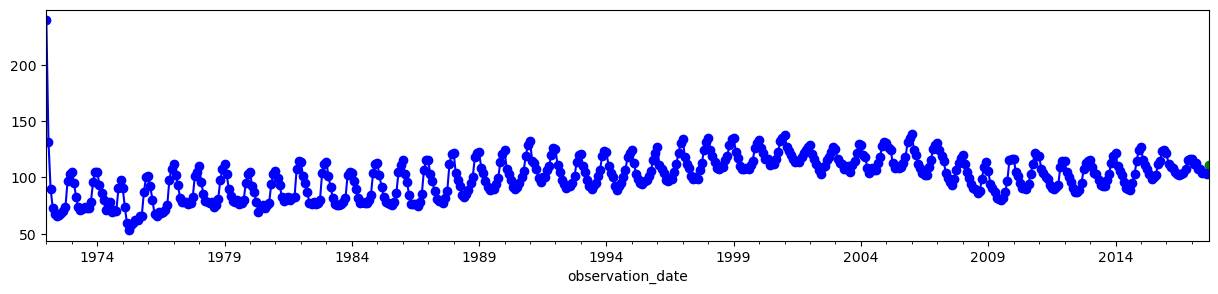

In [79]:
fcast1.plot(marker='o', color='green')
model.fittedvalues.plot(marker='o',  color='blue',figsize=(15,3))

In [83]:
mean_absolute_percentage_error = np.round(np.mean(np.abs(data2.IPG3113N - data2.Forecast)/np.abs(data2.IPG3113N))*100,2)
mean_absolute_percentage_error

8.3

In [87]:
data2 = data.set_index("observation_date")
data2.head()

,IPG3113N
observation_date,
1972-01,85.6945
1972-02,71.8200
1972-03,66.0229
1972-04,64.5645
1972-05,65.0100


In [89]:
fit_auto = SimpleExpSmoothing(data2).fit(optimized=True)
fit_auto.params

{'smoothing_level': 0.9999999850987652,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 85.6945,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [91]:
data2["Forecast"] = np.round(fit_auto.fittedvalues,2)
data2.head()

,IPG3113N,Forecast
observation_date,,
1972-01,85.6945,85.69
1972-02,71.8200,85.69
1972-03,66.0229,71.82
1972-04,64.5645,66.02
1972-05,65.0100,64.56


In [95]:
mean_absolute_percentage_error = np.mean(np.abs(data2.IPG3113N - data2.Forecast)/np.abs(data2.IPG3113N))*100
mean_absolute_percentage_error

6.36504338203345

In [97]:
fcast1 = fit_auto.forecast(1)
fcast1 

2017-09    114.0613
Freq: M, dtype: float64